In [ ]:
from google.colab import files

# This will prompt you to select the kaggle.json file
uploaded = files.upload()

# Confirm upload
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
# Create the .kaggle directory and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Adjust permissions


In [ ]:
# Replace 'dataset-name' with the correct dataset path on Kaggle
!kaggle datasets download -d mistag/short-videos

# Assuming the file is a zip file, unzip it to the desired directory
!unzip -q short-videos.zip -d /content/short-videos


Dataset URL: https://www.kaggle.com/datasets/mistag/short-videos
License(s): CC-BY-NC-SA-4.0
 98% 202M/206M [00:02<00:00, 89.5MB/s]
100% 206M/206M [00:02<00:00, 80.8MB/s]


In [ ]:
# List files to verify successful extraction
!ls /content/short-videos


animals  food  insects	license.txt


In [ ]:
!ls /content/short-videos/animals


elefant_1280p.mp4  giraffes_1280p.mp4


In [ ]:
!ls /content/short-videos/insects

butterflies_1280.mp4  butterflies_960p.mp4


In [ ]:
!ls /content/short-videos/food

seafood_1280p.mp4


In [ ]:
# import cv2
# import numpy as np

# def load_video(video_path, max_frames=60, resize=(224, 224)):
#     cap = cv2.VideoCapture(video_path)
#     frames = []
#     try:
#         while True:
#             ret, frame = cap.read()
#             if not ret or len(frames) == max_frames:
#                 break
#             frame = cv2.resize(frame, resize)
#             frame = frame / 255.0  # Normalize pixel values
#             frames.append(frame)
#     finally:
#         cap.release()
#     return np.array(frames)


In [ ]:
# elephant_video = load_video('/content/short-videos/animals/elefant_1280p.mp4')
# butterflies_video = load_video('/content/short-videos/insects/butterflies_1280.mp4')
# seafood_video = load_video('/content/short-videos/food/seafood_1280p.mp4')

# # Stack videos for batch processing
# videos = np.stack([elephant_video, butterflies_video, seafood_video])
# print(f"Videos stacked for processing, shape: {videos.shape}")


Videos stacked for processing, shape: (3, 60, 224, 224, 3)


In [ ]:
# def build_model_with_hub(url, input_shape=(None, 224, 224, 3)):
#     model = tf.keras.Sequential([
#         # Load the model as a non-trainable layer
#         hub.KerasLayer(url, trainable=False, input_shape=input_shape)
#     ])
#     model.build([None, *input_shape])  # Build the model
#     return model

# # Load the I3D model from TensorFlow Hub
# model_url = 'https://tfhub.dev/deepmind/i3d-kinetics-400/1'
# model = build_model_with_hub(model_url, input_shape=(None, 224, 224, 3))

In [ ]:
# # Making predictions
# predictions = model.predict(videos)
# predicted_classes = np.argmax(predictions, axis=-1)
# print(f"Predicted class indices: {predicted_classes}")

1/1 [==============================] - 30s 30s/step
Predicted class indices: [216 398 287]


In [ ]:
# # Define class names based on typical categories in an action recognition dataset
# class_names = ['Jumping', 'Swimming', 'Flying', 'Running', 'Eating']


# **Visualization**

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Assuming class_names has 400 entries, corresponding to a model trained on Kinetics-400
# class_names = ["Class1", "Class2", ..., "Class400"]  # Extend this list to 400 names

# def plot_predictions(videos, predictions, class_names):
#     fig, axes = plt.subplots(len(videos), 1, figsize=(12, 6 * len(videos)))
#     if len(videos) == 1:
#         axes = [axes]  # Ensure axes is iterable for a single video case

#     for i, video_frames in enumerate(videos):
#         ax = axes[i]
#         ax.imshow(video_frames[0])
#         ax.axis('off')

#         # Check if predicted index is within the range of class_names
#         class_index = predicted_classes[i]
#         if class_index < len(class_names):
#             predicted_class = class_names[class_index]
#             probability = np.max(tf.nn.softmax(predictions[i]))  # Convert logits to probabilities
#             ax.set_title(f"Predicted: {predicted_class} with probability {probability:.2f}")
#         else:
#             ax.set_title("Predicted class index out of range")

#     plt.tight_layout()
#     plt.show()

# plot_predictions([elephant_video, butterflies_video, seafood_video], predictions, class_names)


In [ ]:
# probabilities = tf.nn.softmax(predictions, axis=-1)
# top_probabilities = np.max(probabilities, axis=-1)
# print("Top class probabilities:", top_probabilities)


Top class probabilities: [0.23067847 0.39664423 0.5343831 ]


Videos stacked for processing, shape: (3, 60, 224, 224, 3)


1/1 [==============================] - 30s 30s/step
Predicted class indices: [216 398 287]


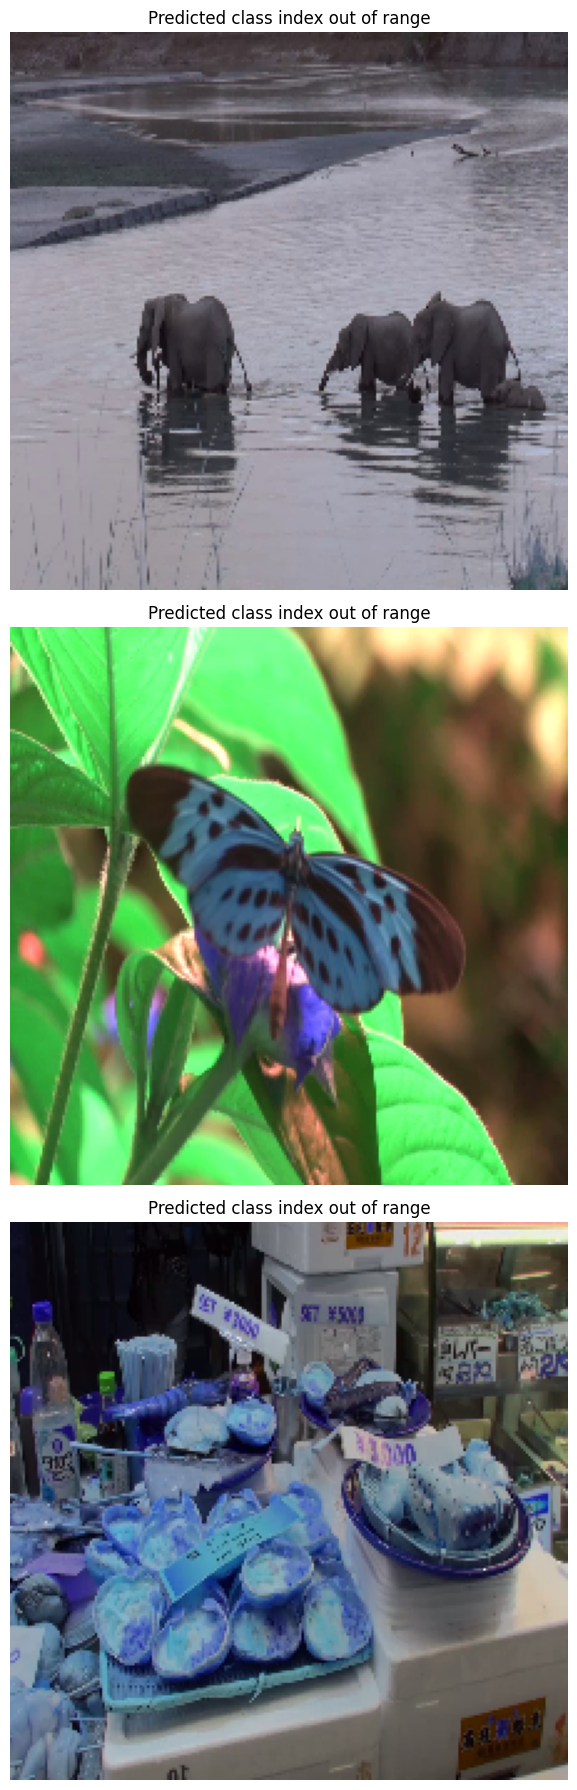

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub

# Function to load video files and prepare them for model input
def load_video(video_path, max_frames=60, resize=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret or len(frames) == max_frames:
            break
        frame = cv2.resize(frame, resize)
        frames.append(frame / 255.0)  # Normalize pixel values
    cap.release()
    return np.array(frames)

# Load videos and ensure they have the correct shape
elephant_video = load_video('/content/short-videos/animals/elefant_1280p.mp4')
butterflies_video = load_video('/content/short-videos/insects/butterflies_1280.mp4')
seafood_video = load_video('/content/short-videos/food/seafood_1280p.mp4')

videos = np.stack([elephant_video, butterflies_video, seafood_video])
print(f"Videos stacked for processing, shape: {videos.shape}")

# Adjust build_model_with_hub to handle the video data correctly
def build_model_with_hub(url, input_shape=(None, 224, 224, 3)):
    model = tf.keras.Sequential([
        hub.KerasLayer(url, trainable=False, input_shape=input_shape, output_shape=[None, 400])
    ])
    model.build([None, *input_shape])  # Explicitly define the input shape
    return model

# Load the I3D model from TensorFlow Hub
model_url = 'https://tfhub.dev/deepmind/i3d-kinetics-400/1'
model = build_model_with_hub(model_url, input_shape=(None, 224, 224, 3))

# Make predictions and handle video frames
predictions = model.predict(videos)
predicted_classes = np.argmax(predictions, axis=-1)
print(f"Predicted class indices: {predicted_classes}")

# Define class names for Kinetics-400
class_names = ["class1", "class2", "class3", ..., "class400"]  # extend this list properly

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def plot_predictions(videos, predictions, class_names):
    probabilities = tf.nn.softmax(predictions, axis=-1)
    predicted_classes = np.argmax(predictions, axis=-1)

    fig, axes = plt.subplots(len(videos), 1, figsize=(12, 6 * len(videos)))
    if len(videos) == 1:
        axes = [axes]  # Ensure axes is iterable for a single video case

    for i, video_frames in enumerate(videos):
        ax = axes[i] if len(videos) > 1 else axes
        ax.imshow(video_frames[0])  # Show the first frame of each video
        ax.axis('off')

        class_index = predicted_classes[i]
        if class_index < len(class_names):
            predicted_class = class_names[class_index]
            probability = np.max(probabilities[i])
            ax.set_title(f"Predicted: {predicted_class} with probability {probability:.2f}")
        else:
            ax.set_title("Predicted class index out of range")

    plt.tight_layout()
    plt.show()

# Assuming you have already defined class_names with 400 entries
class_names = ['Class1', 'Class2', ..., 'Class400']  # Make sure this list is complete

# Example usage of the function:
plot_predictions([elephant_video, butterflies_video, seafood_video], predictions, class_names)

